In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as cp
from sklearn import svm

In [2]:
data = np.loadtxt('source_train.csv', delimiter=',')
X = data[:,:-1]
y = data[:,-1]
data = np.loadtxt('source_test.csv', delimiter=',')
X_test = data[:,:-1]
y_test = data[:,-1]
clf = svm.SVC(kernel='linear')
clf.fit(X,y)
Ws=clf.coef_
Ws_mat=cp.matrix(Ws)
Ws_t=Ws.transpose()

In [3]:
data = np.loadtxt('target_train.csv', delimiter=',')
X = data[:,:-1]
y = data[:,-1]
B=1;
X_t=X.transpose()
y_t=y.transpose()
X_t=cp.matrix(X_t)
Ws_t=cp.matrix(Ws_t)
X_mat=cp.matrix(X)
y_mat=cp.matrix(y)
train_len=len(y)
print(cp.matrix(np.reshape(y,(1,50))))

[ 1.00e+00 -1.00e+00  1.00e+00 -1.00e+00 -1.00e+00  1.00e+00 -1.00e+00 ... ]



In [4]:
def compute_F(y_mat,X_mat,X_t,Ws_t,train_len,i,B):
    Fi=[]
    la=-1*(1 - (B*y_mat[i,:]*X_mat[i,:]*Ws_t))
    Fi=np.append(Fi,la)
    return (Fi)
    
def compute_H(y_mat,X_mat,X_t,Ws_t,train_len,i,B):
    Hi=[[]]
    for j in range(0,train_len):
        l=y_mat[i,:]*y_mat[j,:]*X_mat[i,:]*X_t[:,j]
        Hi =np.append(Hi,l)
    return(Hi.flatten())

P=[]
q=[]
for k in range(0,train_len):
    m=compute_F(y_mat,X_mat,X_t,Ws_t,train_len,k,B)
    l=compute_H(y_mat,X_mat,X_t,Ws_t,train_len,k,B)
    q.append(m)
    P.append(l)
    
q=np.array(q).tolist() 
P=np.array(P).tolist()
P_mat=cp.matrix(P)
q_mat=cp.matrix(np.matrix(q))
P=P_mat
q=q_mat
A=cp.matrix(np.reshape(y,(1,50)))
b=cp.matrix(0.0)
G0=np.identity(50)
#G1=np.full((1,50),-1.0)
#G2=np.full((1,50),C)
G1=np.append(G0,G0,axis=0)
h1=np.full((50,1),0.0)
h2=np.full((50,1),1.0)
h1=np.append(h1,h2,axis=0)
#print(cp.matrix(h1))

In [5]:
G=cp.matrix(G1)
h=cp.matrix(h1)
sol=cp.solvers.qp(P,q,G,h,A,b)
#print(sol['x'])
alpha=sol['x']
#find W
s1=cp.matrix([[0],[0]])

for k in range(0,train_len):
    s1=s1 + A[k]*alpha[k]*X_mat[k,:]
Wt=Ws_mat*B + s1

     pcost       dcost       gap    pres   dres
 0: -1.0444e+01 -6.5249e+01  6e+02  3e+00  2e+00
 1:  3.9360e+00 -9.1629e+01  2e+02  7e-01  5e-01
 2:  1.3702e+00 -1.8036e+01  2e+01  5e-03  4e-03
 3: -1.7953e+00 -3.4268e+00  2e+00  2e-04  1e-04
 4: -2.3232e+00 -2.8100e+00  5e-01  4e-05  3e-05
 5: -2.4529e+00 -2.7300e+00  3e-01  1e-05  8e-06
 6: -2.5626e+00 -2.5678e+00  5e-03  2e-07  1e-07
 7: -2.5646e+00 -2.5647e+00  5e-05  2e-09  1e-09
 8: -2.5647e+00 -2.5647e+00  5e-07  2e-11  1e-11
Optimal solution found.


In [6]:
data = np.loadtxt('target_test.csv', delimiter=',')
X_test = data[:,:-1]
y_test = data[:,-1]
print(Wt[0],Wt[1])

0.43898348124545583 0.11453956630714313


In [7]:
accuracy=len(X_test)
for k in range(0,len(X_test)):
    predict=X_test[k,0]*Wt[0]+X_test[k,1]*Wt[1]
    if(predict*y_test[k]<0):
        accuracy=accuracy-1#misprediction
print("accuracy = ",accuracy/len(X_test)*100)

accuracy =  97.0


[0 0 0 ..., 1 1 1]


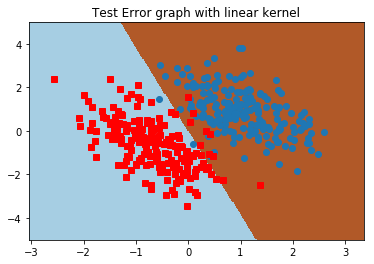

In [8]:
def predict(X_test,y_test,Wt):
    z=list()
    for k in range(0,len(X_test)):
        predict1=X_test[k,0]*Wt[0]+X_test[k,1]*Wt[1]
        if(predict1<0):
            z.append(0)
        else:
            z.append(1)
    stockArr =  np.asarray(z)
    return stockArr.flatten()
        
        
x = np.random.multivariate_normal([-1, -1], [[1, -.25], [-.25, 1]], 500).T
h = .02
x_min, x_max = x.min()+1 , x.max()+1
y_min, y_max = y.min() - 4, y.max() + 4
plt.title("Test Error graph with linear kernel")
plt.plot(X_test[np.where(y_test==1.0)[0], 0], X_test[np.where(y_test==1)[0], 1], 'o')
plt.plot(X_test[np.where(y_test==-1)[0], 0], X_test[np.where(y_test==-1)[0], 1], 's', c = 'r')
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)
)
Z = predict(np.c_[xx.ravel(), yy.ravel()],y_test,Wt)
print(Z)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.show()